***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [91]:
path = '../data/alura_Estatística_com_Python/01/dados.csv'

### Visualize o conteúdo do DataFrame

In [92]:
data = pd.read_csv(path)
data.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [93]:
sm = 788
classes = [0, 2*sm, 5*sm, 15*sm, 25*sm, np.inf]

### 2º Definir os labels das classes

In [94]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [95]:
cut_series = pd.cut(data.Renda, bins=classes, labels=labels, include_lowest = True)
frequency = pd.value_counts(cut_series)

### 4º Construir a coluna de percentuais

In [96]:
percentual = (pd.value_counts(cut_series, normalize=True)*100).round(2)

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [97]:
df_freq = pd.DataFrame({'Frequency':frequency,'Percentual(%)':percentual}).sort_index(ascending=False)
df_freq

,Frequency,Percentual(%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

Text(0.5, 0, 'Classes')

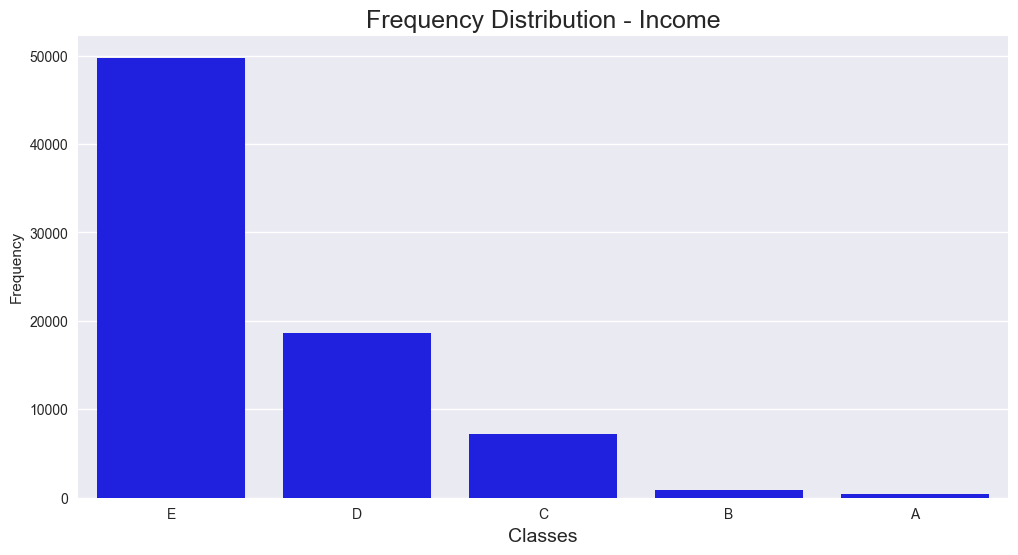

In [98]:
ax = sns.barplot(y=df_freq['Frequency'],x=df_freq.index, color='blue')

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Income', fontsize=18)
ax.set_xlabel('Classes', fontsize=14)

> ### Conclusões

Concentração de renda dentro da classe E como o esperado, classes A e B com partiipação mínima em comparção com o restante.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [99]:
data.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [100]:
quantitative_var = ['Idade', 'Anos de Estudo', 'Renda', 'Altura']

C:\Users\g_fma\AppData\Local\Temp\ipykernel_30312\1331541295.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


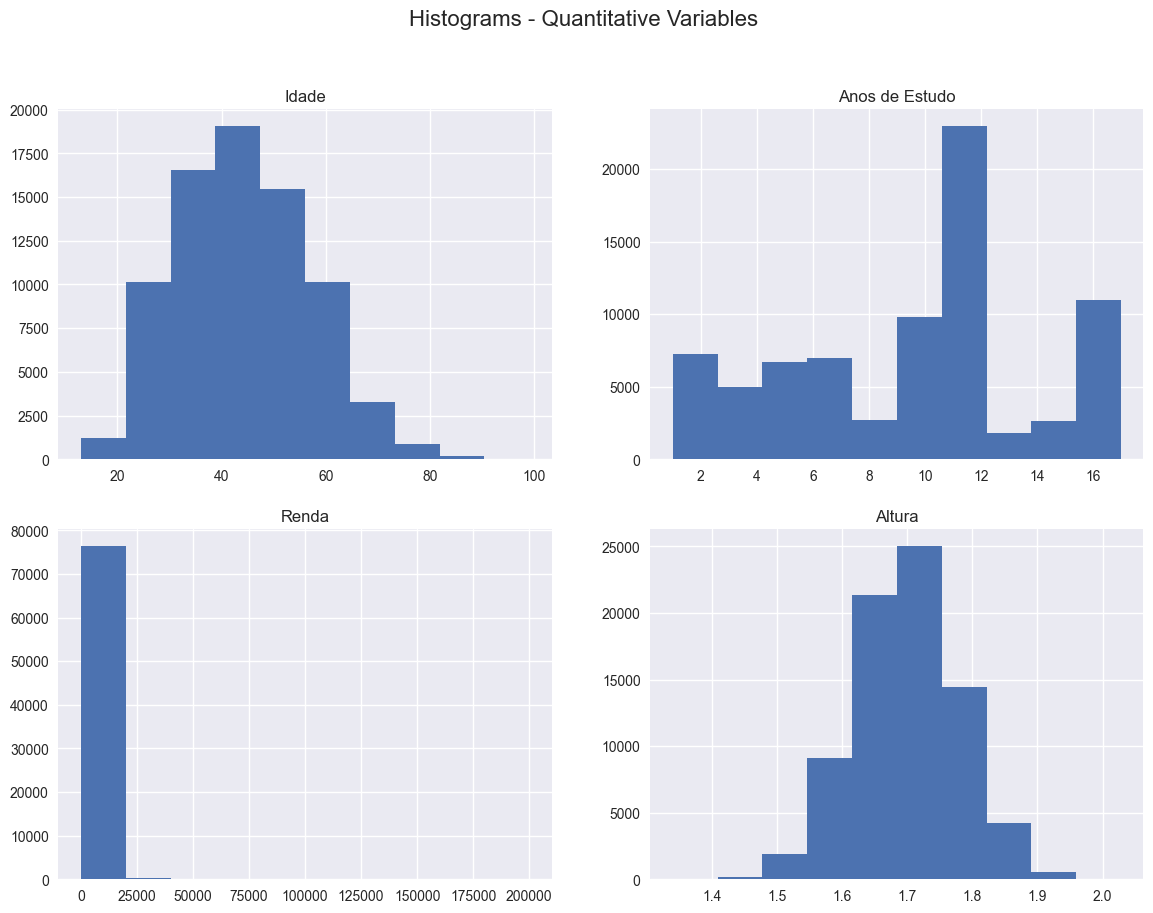

In [101]:
columns = 2
rows = int(np.ceil(len(quantitative_var)/columns))

plt.style.use("seaborn")
plt.figure(figsize = ((14, 10)))

for i in  range(len(quantitative_var)):

    plt.subplot(rows, columns, i+1)
    plt.title(quantitative_var[i], fontsize = 12)
    plt.hist(data[quantitative_var[i]])

plt.suptitle("Histograms - Quantitative Variables", fontsize = 16)
plt.show()

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

(array([54203., 14125.,  4169.,  1532.,   805.,   761.,   294.,   341.,
          118.,    72.]),
 array([    0. ,  1966.3,  3932.6,  5898.9,  7865.2,  9831.5, 11797.8,
        13764.1, 15730.4, 17696.7, 19663. ]),
 <BarContainer object of 10 artists>)

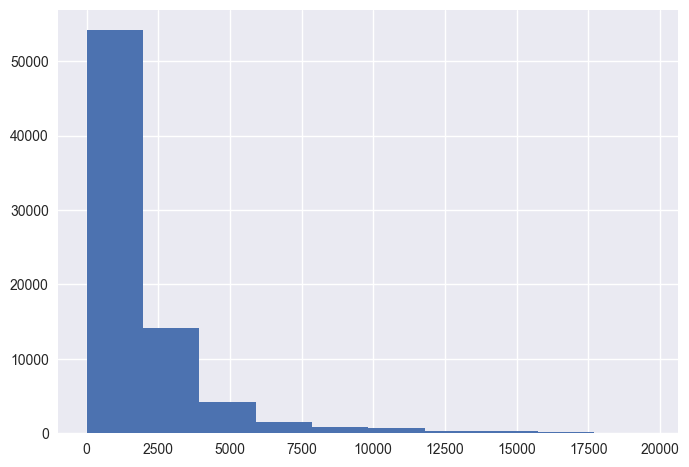

In [102]:
plt.hist(data.query('Renda < 20000').Renda)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [103]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [104]:
data.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [105]:
frequency_cross = pd.crosstab(data.Sexo, data.Cor)
frequency_cross.rename(sexo, axis=0, inplace=True)
frequency_cross.rename(cor, axis=1, inplace=True)

frequency_cross

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [106]:
percentual_cross = (pd.crosstab(data.Sexo, data.Cor, normalize=True)*100).round(2)
percentual_cross.rename(sexo, axis=0, inplace=True)
percentual_cross.rename(cor, axis=1, inplace=True)

percentual_cross

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


In [107]:
# or

#data.Sexo.replace(sexo) #inplace=True
#data.Cor.replace(cor) #inplace=True

# and then crosstab

#frequency_cross = pd.crosstab(data.Sexo, data.Cor)
#percentual_cross = (pd.crosstab(data.Sexo, data.Cor, normalize=True)*100).round(2)

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [108]:
data.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [109]:
data.Renda.median()

1200.0

### Obtenha a moda

In [110]:
data.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [111]:
data.Renda.mad()

C:\Users\g_fma\AppData\Local\Temp\ipykernel_30312\3374860638.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  data.Renda.mad()


1526.4951371638058

In [112]:
(data.Renda - data.Renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [113]:
data.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [114]:
data.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [115]:
cross_agg = pd.crosstab(data.Sexo, data.Cor, values=data.Renda, aggfunc={'mean','median','max'}).round(2)
cross_agg.rename(sexo, axis=0, inplace=True)
cross_agg.rename(cor, axis=1, inplace=True)

In [116]:
cross_agg

max                                    mean                    \
Cor       Indígena  Branca  Preta Amarela   Parda Indígena   Branca    Preta   
Sexo                                                                           
Masculino    10000  200000  50000   50000  100000  1081.71  2925.74  1603.86   
Feminino    120000  100000  23000   20000   30000  2464.39  2109.87  1134.60   

                              median                                  
Cor        Amarela    Parda Indígena  Branca   Preta Amarela   Parda  
Sexo                                                                  
Masculino  4758.25  1659.58    797.5  1700.0  1200.0  2800.0  1200.0  
Feminino   3027.34  1176.76    788.0  1200.0   800.0  1500.0   800.0

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
cross_agg_d = pd.crosstab(data.Sexo, data.Cor, values=data.Renda, aggfunc={'mad','var','std'}).round(2)
cross_agg_d.rename(sexo, axis=0, inplace=True)
cross_agg_d.rename(cor, axis=1, inplace=True)

In [118]:
cross_agg_d

mad                                          std           \
Cor       Indígena   Branca   Preta  Amarela    Parda  Indígena   Branca   
Sexo                                                                       
Masculino   798.91  2261.01  975.60  3709.60  1125.83   1204.09  4750.79   
Feminino   3007.89  1670.97  705.45  2549.15   811.58  11957.50  3251.01   

                                               var                           \
Cor          Preta  Amarela    Parda      Indígena       Branca       Preta   
Sexo                                                                          
Masculino  1936.31  5740.82  2312.09  1.449841e+06  22570023.41  3749293.59   
Feminino   1349.80  3731.17  1596.23  1.429818e+08  10569086.53  1821959.52   

                                    
Cor            Amarela       Parda  
Sexo                                
Masculino  32957069.62  5345747.15  
Feminino   13921656.88  2547959.94

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='green'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

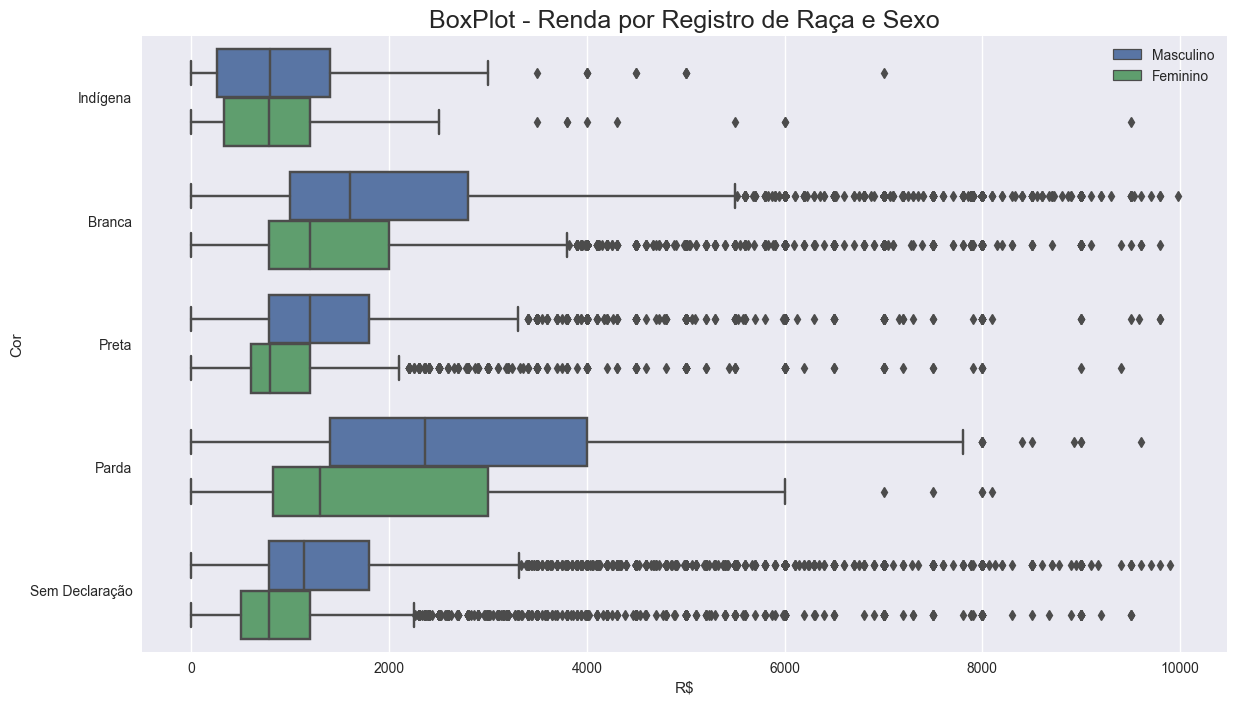

In [119]:
ax = sns.boxplot(x='Renda', y='Cor', data=data.query('Renda < 10000'), hue='Sexo', orient='h')

ax.figure.set_size_inches(14,8)

ax.set_title('BoxPlot - Renda por Registro de Raça e Sexo', fontsize=18)
ax.set_xlabel('R$')
ax.set_ylabel('Cor')
ax.set_yticklabels(['Indígena','Branca','Preta','Parda','Sem Declaração'])

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'])

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [120]:
from scipy import stats

stats.percentileofscore(a=data.Renda , score=788, kind='weak').round(2)

28.87

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [121]:
data.Renda.quantile(.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [88]:
cross_agg_ano_estudo = pd.crosstab(data['Anos de Estudo'], data.Sexo, values=data.Renda, aggfunc={'mean','median','max','std'}).round(2)

cross_agg_ano_estudo.rename(sexo, axis=1, inplace=True)
cross_agg_ano_estudo.rename(anos_de_estudo, axis=0, inplace=True)

In [89]:
cross_agg_ano_estudo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='green'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

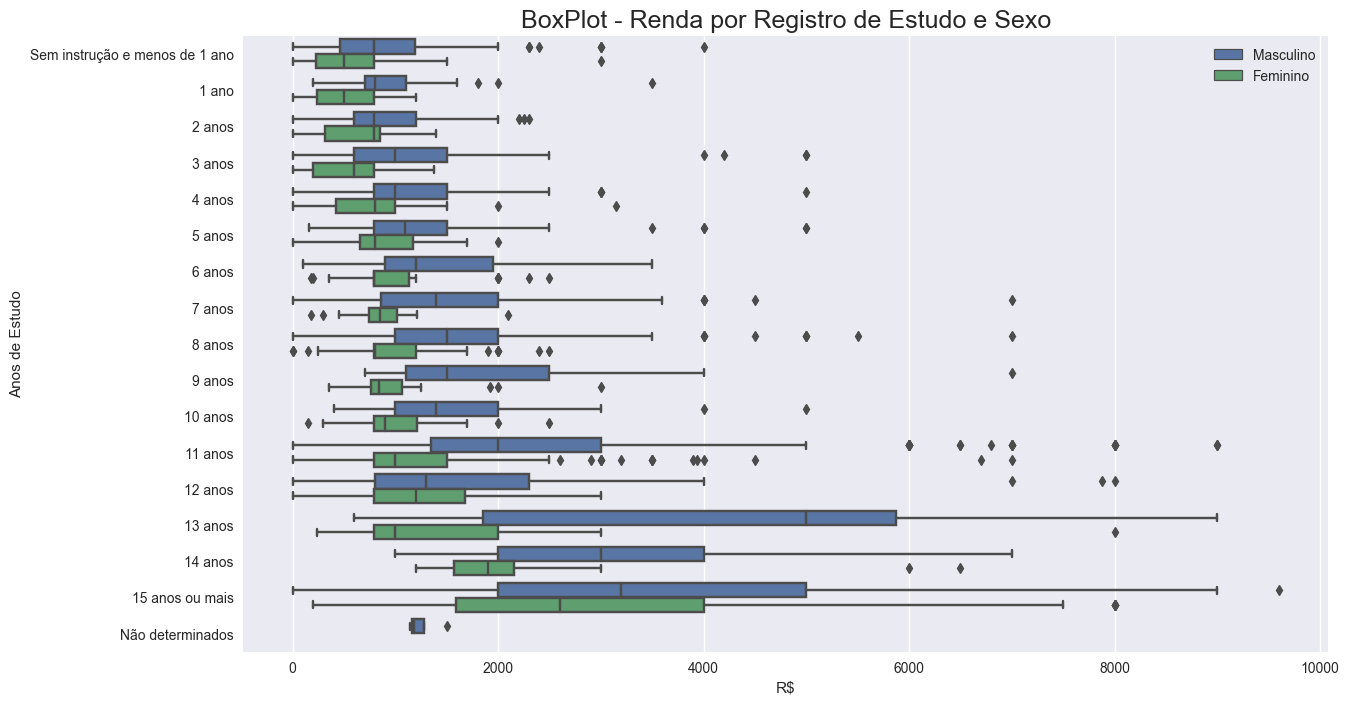

In [128]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', data=data.query('Renda < 10000 and Idade == 50'), hue='Sexo', orient='h')

ax.figure.set_size_inches(14,8)

ax.set_title('BoxPlot - Renda por Registro de Estudo e Sexo', fontsize=18)
ax.set_xlabel('R$')
ax.set_ylabel('Anos de Estudo')
ax.set_yticklabels([key for key in anos_de_estudo.values()])

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'])

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [129]:
group_uf = data.groupby(['UF']).agg({'Renda':['mean','median','max','std']}).round(2)

group_uf.rename(uf, axis=0, inplace=True)

In [130]:
group_uf

Renda                         
                        mean  median     max      std
UF                                                   
Rondônia             1789.76  1200.0   50000  2406.16
Acre                 1506.09   900.0   30000  2276.23
Amazonas             1445.13   900.0   22000  1757.94
Roraima              1783.59  1000.0   20000  2079.66
Pará                 1399.08   850.0   50000  2053.78
Amapá                1861.35  1200.0   15580  2020.69
Tocantins            1771.09  1000.0   60000  2934.59
Maranhão             1019.43   700.0   30000  1887.82
Piauí                1074.55   750.0   40000  2373.36
Ceará                1255.40   789.0   25000  1821.96
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Paraíba              1293.37   788.0   30000  1950.27
Pernambuco           1527.08   900.0   50000  2389.62
Alagoas              1144.55   788.0   11000  1237.86
Sergipe              1109.11   788.0   16000  1479.00
Bahia                1429.65   800.0  200000  3507.92
Minas Gerais         2056.43  1200.0  100000  3584.72
Espírito Santo       2026.38  1274.0  100000  3513.85
Rio de Janeiro       2496.40  1400.0  200000  5214.58
São Paulo            2638.10  1600.0   80000  3503.78
Paraná               2493.87  1500.0  200000  4302.94
Santa Catarina       2470.85  1800.0   80000  3137.65
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Mato Grosso          2130.65  1500.0   35000  2542.63
Goiás                1994.58  1500.0   30000  2221.93
Distrito Federal     4241.95  2000.0  100000  5550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

[Text(0, 0, 'Rondônia'),
 Text(0, 1, 'Acre'),
 Text(0, 2, 'Amazonas'),
 Text(0, 3, 'Roraima'),
 Text(0, 4, 'Pará'),
 Text(0, 5, 'Amapá'),
 Text(0, 6, 'Tocantins'),
 Text(0, 7, 'Maranhão'),
 Text(0, 8, 'Piauí'),
 Text(0, 9, 'Ceará'),
 Text(0, 10, 'Rio Grande do Norte'),
 Text(0, 11, 'Paraíba'),
 Text(0, 12, 'Pernambuco'),
 Text(0, 13, 'Alagoas'),
 Text(0, 14, 'Sergipe'),
 Text(0, 15, 'Bahia'),
 Text(0, 16, 'Minas Gerais'),
 Text(0, 17, 'Espírito Santo'),
 Text(0, 18, 'Rio de Janeiro'),
 Text(0, 19, 'São Paulo'),
 Text(0, 20, 'Paraná'),
 Text(0, 21, 'Santa Catarina'),
 Text(0, 22, 'Rio Grande do Sul'),
 Text(0, 23, 'Mato Grosso do Sul'),
 Text(0, 24, 'Mato Grosso'),
 Text(0, 25, 'Goiás'),
 Text(0, 26, 'Distrito Federal')]

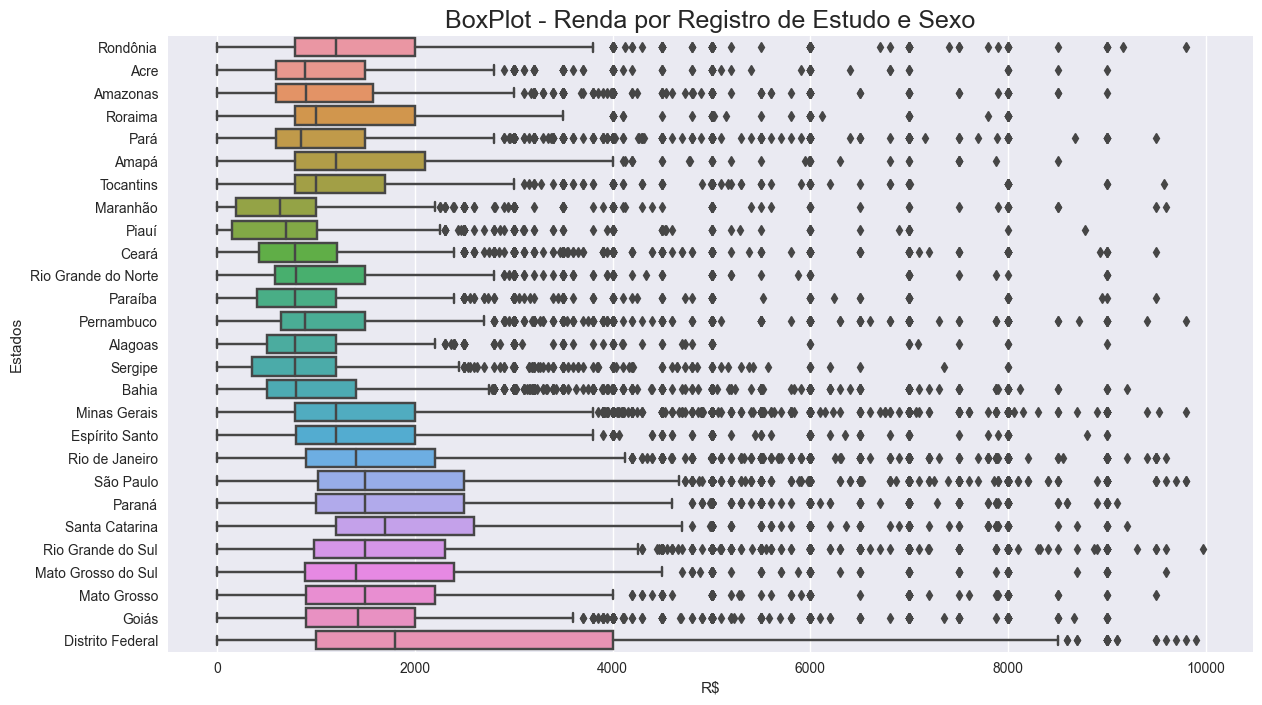

In [131]:
ax = sns.boxplot(x='Renda', y='UF', data=data.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14,8)

ax.set_title('BoxPlot - Renda por Registro de Estudo e Sexo', fontsize=18)
ax.set_xlabel('R$')
ax.set_ylabel('Estados')
ax.set_yticklabels([key for key in uf.values()])